# Полезные ссылки:

https://developers.google.com/

https://www.section.io/engineering-education/handpose-detection-using-mediapipe-and-python/

https://www.kaggle.com/code/alifarajnia/pose-detection-mediapipe

https://colab.research.google.com/github/cedro3/mediapipe/blob/main/mediapipe_for_movie.ipynb

# Что такое MediaPipe:

MediaPipe - это кроссплатформенная платформа машинного обучения с открытым исходным кодом, используемая для построения сложных и мультимодальных конвейеров прикладного машинного обучения. Его можно использовать для создания передовых моделей машинного обучения, таких как распознавание лиц, отслеживание нескольких рук, обнаружение объектов и слежение и многое другое.

Возможности MediaPipe:
1. Определение и отслеживание позы человека Высокоточное отслеживание позы человеческого тела, позволяющее определить минимум 25 2D-ориентиров верхней части тела по видеокадрам RGB

2. Сетка лиц: 468 лицевых ориентиров в 3D с поддержкой нескольких лиц.

3. Отслеживание 21 ориентира руки в 3D. Поддержкой нескольких рук на основе высокопроизводительного распознавания ладони и модели ориентира руки

4. Целостное отслеживание Одновременное и семантически согласованное отслеживание 33 поз, 21 для каждой руки и 468 лицевых ориентиров

5. Сегментация волос, суперреалистичное перекрашивание волос в режиме реального времени

6. Обнаружение и отслеживание объектов на видео в едином конвейере

7. Сверхлегкий детектор лиц с 6 ориентирами и поддержкой нескольких лиц.

8. Отслеживание радужной оболочки глаза человека, зрачка и контура глаз.

9. Обнаружение 3D-объектов

Mediapipe Holistic - это один из конвейеров, содержащий оптимизированные компоненты лица, рук и позы, который обеспечивает целостное отслеживание, позволяя модели одновременно определять позы рук и тела, а также ориентиры на лице.

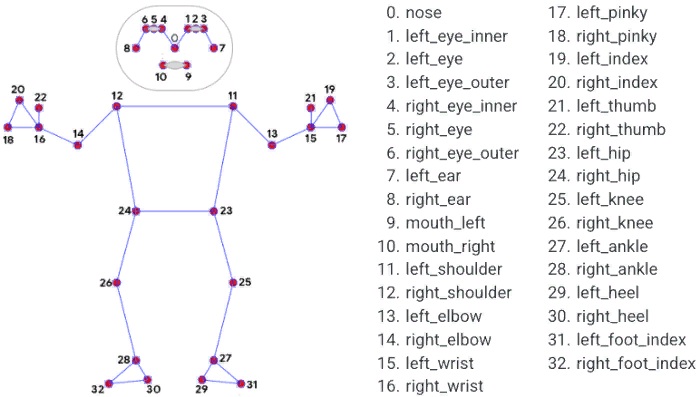

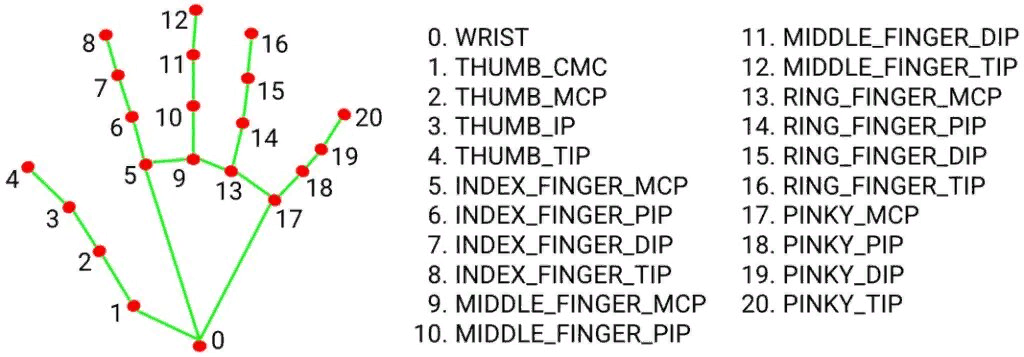

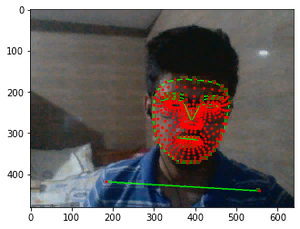

# Примеры использования

In [1]:
!pip install -q mediapipe==0.10.0
!pip install opencv-python


In [31]:
import mediapipe as mp
import cv2
import numpy as np
import uuid
import os
import time
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
from google.colab.patches import cv2_imshow

## Input: Video

### Hands

In [ ]:
video_file = # your video here

In [ ]:
drawingModule = mp.solutions.drawing_utils
handsModule = mp.solutions.hands


capture = cv2.VideoCapture(video_file)

with handsModule.Hands(static_image_mode=False, min_detection_confidence=0.7, min_tracking_confidence=0.7, max_num_hands=2) as hands:

    while True:

        ret, frame = capture.read()
        if not ret:
          break

        results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        if results.multi_hand_landmarks != None:
            for handLandmarks in results.multi_hand_landmarks:
                drawingModule.draw_landmarks(frame, handLandmarks, handsModule.HAND_CONNECTIONS)

        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.show()

        if cv2.waitKey(1) == 27:
            break

cv2.destroyAllWindows()
capture.release()



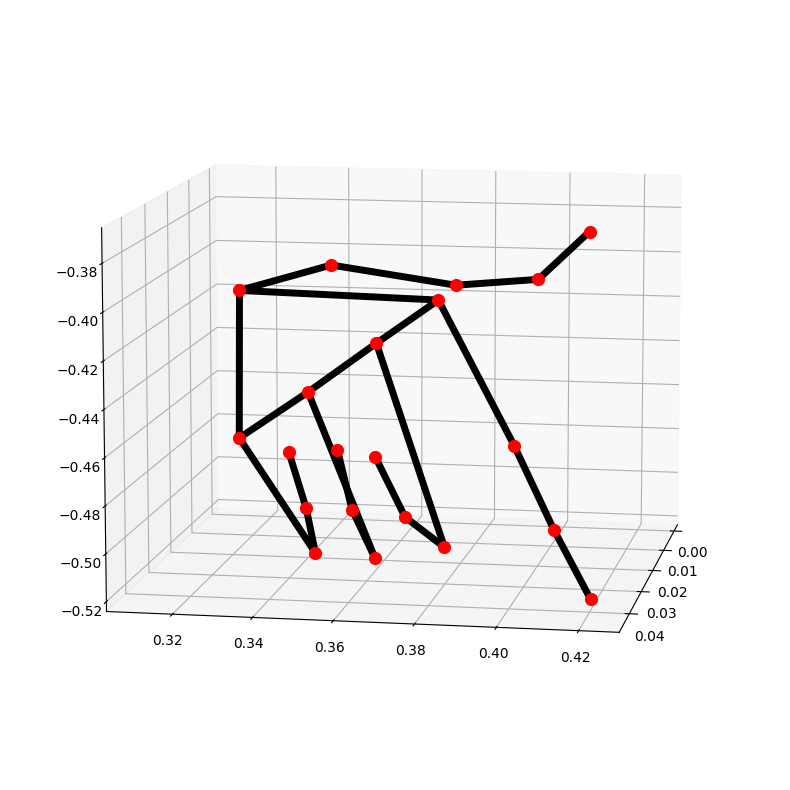

In [26]:
drawingModule.plot_landmarks(handLandmarks, handsModule.HAND_CONNECTIONS)

### Holistic

In [11]:
video_file = # your video here

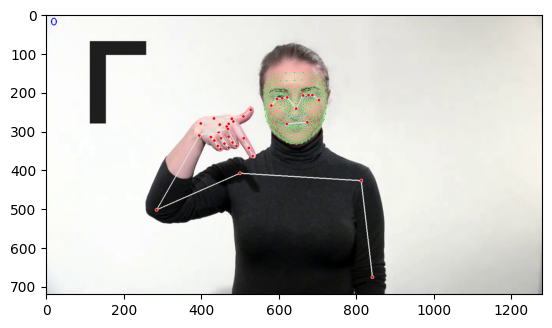

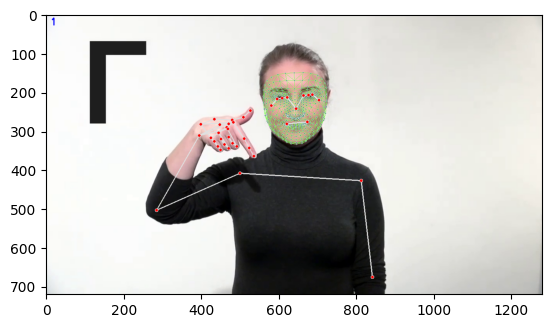

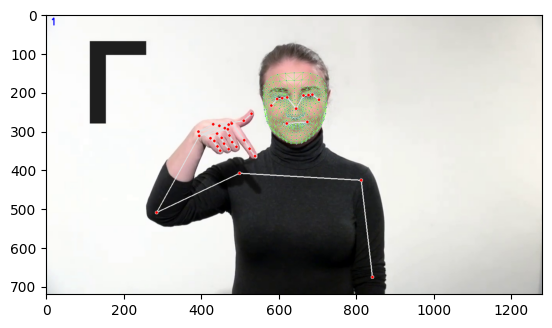

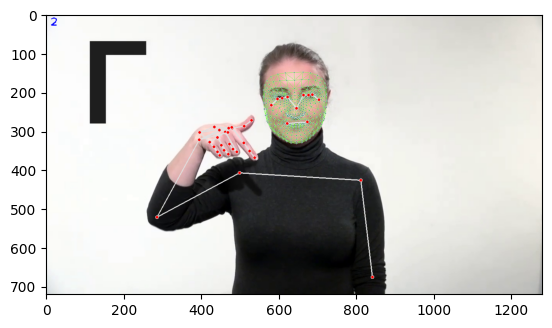

In [33]:
drawingModule = mp.solutions.drawing_utils
holisticsModule = mp.solutions.holistic


capture = cv2.VideoCapture(video_file)

with holisticsModule.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while True:
        ret, frame = capture.read()
        if not ret:
          break
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)


        results = holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        drawingModule.draw_landmarks(image, results.face_landmarks, holisticsModule.FACEMESH_TESSELATION,
                                drawingModule.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                                        drawingModule.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                                        )
        # Right hand
        drawingModule.draw_landmarks(image, results.right_hand_landmarks, holisticsModule.HAND_CONNECTIONS)

        # Left Hand
        drawingModule.draw_landmarks(image, results.left_hand_landmarks, holisticsModule.HAND_CONNECTIONS)

        # Pose Detections
        drawingModule.draw_landmarks(image, results.pose_landmarks, holisticsModule.POSE_CONNECTIONS)

        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()

        if cv2.waitKey(1) == 27:
            break

cv2.destroyAllWindows()
capture.release()

### Plot landmarks

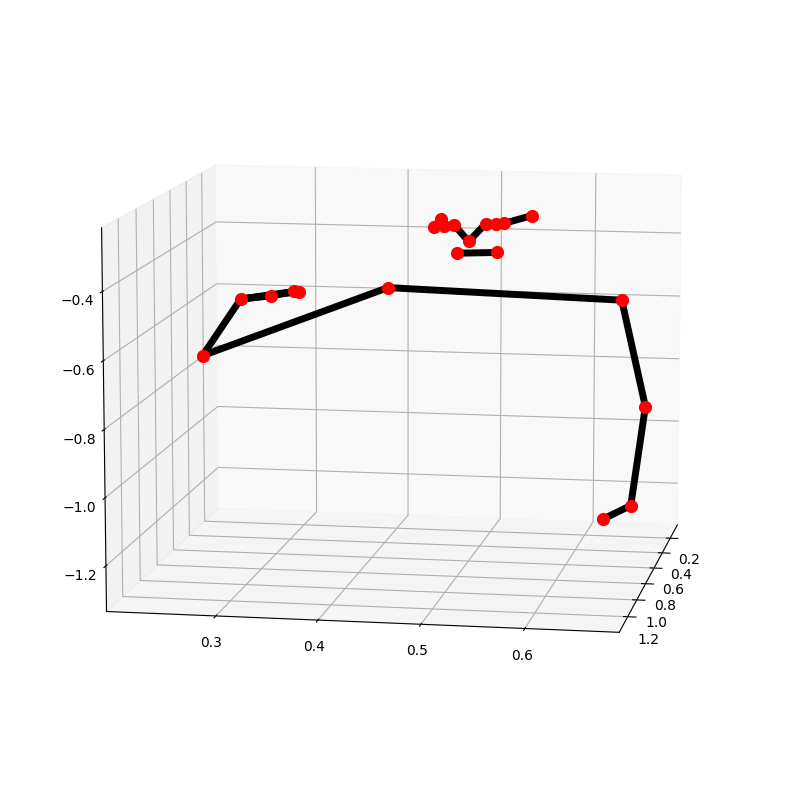

In [18]:
drawingModule.plot_landmarks(results.pose_landmarks, holisticsModule.POSE_CONNECTIONS)

## Input: image

### Take photo (Colab)

In [34]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### Hand

In [36]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [ ]:
cap = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: #You can pass `max_num_hands` argument here as well if you want to detect more that one hand

        image = cv2.cvtColor(cap, cv2.COLOR_BGR2RGB)

        image.flags.writeable = False

        results = hands.process(image)

        image.flags.writeable = True

        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        print(results)

        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS,
                                         )

        cv2.imwrite('{}.jpg'.format(uuid.uuid1()), image)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()

cv2.destroyAllWindows()